# Lesson 7: Data Visualization Part I

Data visualization is made easy in Python with the use of several libraries. Some of the most common libraries used in Python for data visualization are Matplotlib, Seaborn and Plotly. Certain libraries may be better than others depending on the use case. 

For the purpose of this lesson we will follow a couple of examples from these libraries. We will also learn what distinguishes each library from the others.

## Matplotlib

- This library is perhaps the most common Python library for visualizating data. 
- The advantage of Matplotlib is that it is easy to see the property of the data with the help of Numpy and Pandas. 
- For example, if you are interested in seeing the distribution of certain elements within your dataset then using this library may be ideal.

- It is important to note that this library is mainly used for basic plotting such as bars, pie charts, lines, scatterplots and so on. 
- If you are looking for more complex visualizations then more code will be required when using this library.

- In the following examples we will use this library to visualize the Titanic dataset.


In [82]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Now let's begin visualizing data using the Titanic dataset.

In [83]:
#loading Titanic dataset
data = pd.read_csv('titanic_train.csv')

#Let's view the first 7 rows
data.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


#### Visualizing categorical variables

Now let's look at the distribution of the gender categories.

To accomplish this we will first take in the "sex" column, apply the value_counts() pandas function, and finally plot by inputting "bar" graph type. 

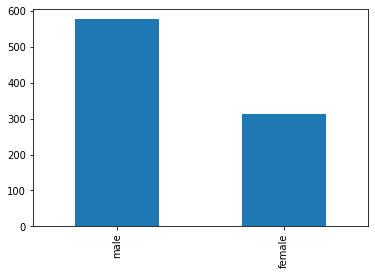

In [84]:
#Let's look at the distribution of the gender categories

ax = data["Sex"].value_counts().plot(kind='bar')
plt.show()

#### Color customization
- In the example above we see the bars are colored blue, but what if we want to modify the color?

- With any library, we are given options to further customize our visualization. For example, if we want to modify the colors, we can do so by adding color=[ ] to the function. 

- For a list of colors, you can visit the following website: https://matplotlib.org/3.1.0/gallery/color/named_colors.html


#### Axis label customization
- We can also modify the tick labels. The example below shows you how to do that. 

- For a complete list of parameters please visit this website: https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.plot.html

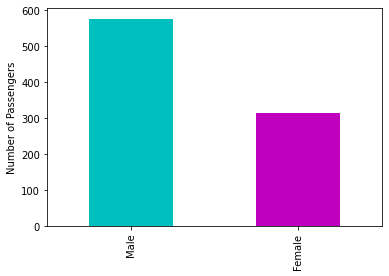

In [85]:
#Using base color "c" for teal and "m" for dark pink color
ax = data["Sex"].value_counts().plot(kind='bar', color=['c', 'm'])
ax.set_xticklabels(["Male", "Female"])
ax.set(ylabel='Number of Passengers')
plt.show()

#### Visualizing Numerical Variables

- We can use a histogram to visualize the distribution of a quantitative variable. 
- What histograms allow us to do is identify the total number of times a specific variable is shown within the data set. 

- In this example we will visualize histograms of our numerical data to show the count of each item.

#### Histogram customization
- The histogram function allows the following parameters: 
    - x : This parameter are the sequence of data.
    - bins : This parameter is an optional parameter and it contains the integer or sequence or string.
    - histtype : This parameter is an optional parameter and it is used to draw type of histogram. {‘bar’, ‘barstacked’, ‘step’, ‘stepfilled’}
    - color : This parameter is an optional parameter and it is a color spec or sequence of color specs, one per dataset.
    - For a list of the complete set of parameters please visit https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

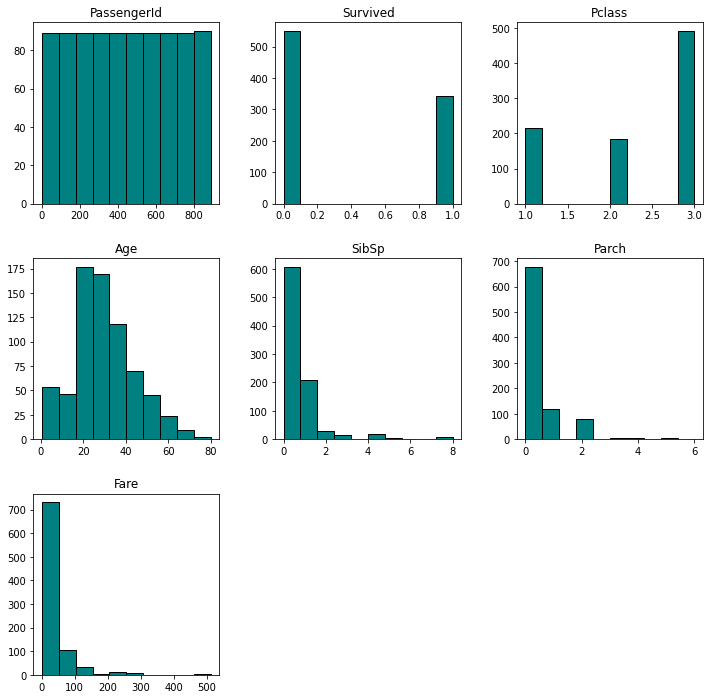

In [86]:
#We will use the .hist function to plot the histograms of our numerical data
histograms = data.hist(bins=10, figsize=(12,12), grid=False, 
        color='teal', edgecolor='black')

## Seaborn

- This library is also built upon Numpy and Pandas, as well as Matplotlib. 
- Seaborn tends to be easier to use requiring less code while providing similar plots as Matplotlib. 
- However the disadvantage is that it can be more constrained with less options to customize (but with nicer design).


- The example below will show a plot similar to our first example in line 2 for comparison.

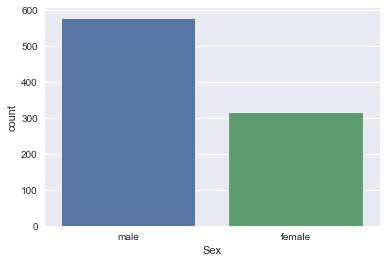

In [87]:
#Creating a bar graph similarly to the one we plotted in line 2
sns.set(style="darkgrid")
ax = sns.countplot(x=data["Sex"], data=data)

- What is the difference between this plot made using Seaborn vs. the plot on line 2 made using MatplotLib?


    - Did not specify labels on x-axis and y-axis but they were added by default using Seaborn.
   
    - Seaborn plot contains a light gray grid with horizontal lines whereas Matplotlib does not contain a background.
    
 - Similar to Matplotlib, you can also further customize this plot by adjusting the parameters. 
 - For a complete list of parameters please visit this website:  https://seaborn.pydata.org/generated/seaborn.countplot.html

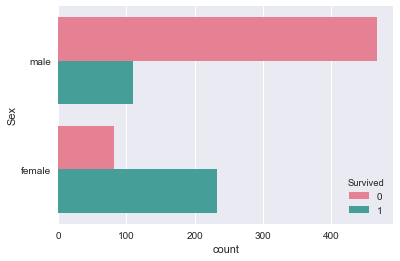

In [88]:
#Let's use a different color palette in the example above
sns.set(style="darkgrid")
ax = sns.countplot(y=data["Sex"], data=data, palette="husl", hue="Survived")

#### Visualizing categorical features

- Besides bar graphs (as shown previously), we can visualize categorical features using heat maps. 
- Categorical data can be nominal/qualitative or ordinal.
    - Nominal/qualitative - no order (such as country, age, gender, etc.)
    - Ordinal - does contain order (such as hot/cold/warm, or good/better/best)
    

- In the following example we will visualize passenger class, or "Pclass" (ordinal feature) vs. "Survived"

In [89]:
#First we must group the dataset by Pclass and Survived to gather the total count
group = data.groupby(['Pclass', 'Survived'])
pclass_survived = group.size().unstack()

pclass_survived

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

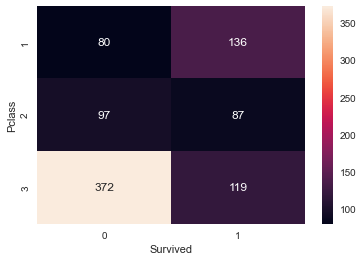

In [90]:
#Visualizing using heatmap function from the seaborn library
heatmap = sns.heatmap(pclass_survived, annot = True, fmt='d')
heatmap

- In the example above we used the heatmap function to show the number of passengers by Pclass and whether or not they survived.

- In this case, the lower the value the darker the shade. 

- Next we will look at the distribution of ages.

- For the distribution we will use a bivariate distribution using kernel density estimation.

- A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, similar to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions. 

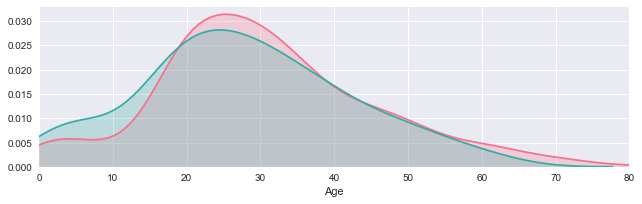

In [91]:
#Using FaceGrid 
fg = sns.FacetGrid(data, hue="Sex", aspect=3, palette='husl')
fg.map(sns.kdeplot, "Age", shade=True)
fg.set(xlim=(0, 80));

## Plotly

- This library is ideal for interactive graphs making it easier for users to disect data points. 
- It can also create similar charts as Matplotlib and Seaborn such as line plots, scatter plots, area charts, bar charts, etc. 

- Plotly Express is one of the easiest functions to use requiring less code to execute.

In [92]:
#Creating a scatterplot of Age, Fare, Pclass, Survived
fig = px.scatter(data[:100],
          x='Fare',
          y='Age',
          color='Pclass',
          size='Survived')
fig.show()

In the example above we can see that by hovering over a data point we can learn more information about that specific data point.

Now let's look at a distrubution plot showly the age range by survival. 

In [93]:
# Creating a histogram of age by survival
hist = px.histogram(data,x = "Age", opacity = 0.7, color = "Survived")
hist

In [94]:
#Create a boxplot to find the max, min, median, and quartiles of fare by gender
boxplot = px.box(data, x="Sex", y="Fare")
boxplot.show()

# LAB

Given the Titanic dataset, please answer the following questions using the specified library. 

#### Matplotlib
Questions: 
- How many female passengers were in class 1, class 2, and class 3? 
- How many male passengers were in class 1, class 2, and class 3? 

In [64]:
# You can answer the question above through a bar graph, histogram, or pie chart (bonus points!)

#Load the necessary data






#Create plot and customize as needed




#Show plot


#### Seaborn

Questions:

- How does passenger count vary as age increases?
- How does it vary by those who survived vs those who did not.

Note: You can answer these questions through one or two graphs. 

In [ ]:
# You can answer this through a line trend

#Load the necessary data






#Create plot and customize as needed




#Show plot


#### Plotly

Question: 
- Does fare increase or decrease for each passenger class? 


In [78]:
#Load the necessary data






#Create plot and customize as needed



#Show plot
